**About the company**

Bellabeat, is a high-tech manufacturer of health-focused products for women. Bellabeat is a successful small company and they have the potential to become a larger player in the global smart device market. Urška Sršen, cofounder and Chief Creative Officer of Bellabeat, believes that analyzing smart device fitness data could help unlock new growth opportunities for the company

**Questions for the analysis**

1. What are some trends in smart device usage?
2. How could these trends apply to Bellabeat customers?
3. How could these trends help influence Bellabeat marketing strategy 

**Business task**

Identify potential opportunities for growth and recommendations for the Bellabeat marketing strategy improvement based on trends in smart device usage.


I cleaned all data files in Excel and then moved them over to my notebook to analyze with R. There were some issues with date and time as they were in Numerical so I split them into seperate cells in Excel so that I can reformat them to the Date/Time format.
The heartrate and weight log files only had 7/8 entries compared to the 33/24 unique IDs in the other datasets and will not be enough data for analysis at this time.


**Loading Packages**

In [1]:
library(tidyverse)
library(lubridate)
library(dplyr)
library(ggplot2)
library(tidyr)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.2     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.2     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.1     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


**Importing the Fitbit Datasets**

In [2]:
activity <- read.csv("/kaggle/input/clean-fitbit-data/DailyActivity_merged - dailyActivity_merged.csv (2).csv")
calories <- read.csv("/kaggle/input/clean-fitbit-data/hourlyCalories_merged - hourlyCalories_merged.csv.csv")
intensities <- read.csv("/kaggle/input/clean-fitbit-data/hourlyIntensities_merged - hourlyIntensities_merged.csv (1).csv")
sleep <- read.csv("/kaggle/input/clean-fitbit-data/DaySleep_merged - sleepDay_merged.csv")


In [3]:
activity <- read.csv("/kaggle/input/clean-fitbit-data/DailyActivity_merged - dailyActivity_merged.csv (2).csv")
calories <- read.csv("/kaggle/input/clean-fitbit-data/hourlyCalories_merged - hourlyCalories_merged.csv.csv")
intensities <- read.csv("/kaggle/input/clean-fitbit-data/hourlyIntensities_merged - hourlyIntensities_merged.csv (1).csv")
sleep <- read.csv("/kaggle/input/clean-fitbit-data/DaySleep_merged - sleepDay_merged.csv")


Checking that the datasets imported correctly with Head

In [4]:
head(activity)

,Id,Date,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
,<dbl>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>
1,1503960366,4/12/2016,13162,8.50,8.50,0,1.88,0.55,6.06,0,25,13,328,728,1985
2,1503960366,4/12/2016,10735,6.97,6.97,0,1.57,0.69,4.71,0,21,19,217,776,1797
3,1503960366,4/12/2016,10460,6.74,6.74,0,2.44,0.40,3.91,0,30,11,181,1218,1776
4,1503960366,4/12/2016,9762,6.28,6.28,0,2.14,1.26,2.83,0,29,34,209,726,1745
5,1503960366,4/12/2016,12669,8.16,8.16,0,2.71,0.41,5.04,0,36,10,221,773,1863
6,1503960366,4/12/2016,9705,6.48,6.48,0,3.19,0.78,2.51,0,38,20,164,539,1728


**Analyzing and Summarizing the Datasets**

In [5]:
n_distinct(activity$Id)
n_distinct(calories$Id)
n_distinct(intensities$Id)
n_distinct(sleep$Id)


[1] 34

[1] 33

[1] 33

[1] 24

This gives us the number of unique IDs in each dataset, there are 33 unique IDs in activity,calories,intensities, and 24 in sleep. We can now look at a summary of the statistics in the datasets.

In [6]:
# activity
activity %>%  
  select(TotalSteps,
         TotalDistance,
         SedentaryMinutes, Calories) %>%
  summary()
# sleep
sleep %>%
  select(TotalSleepRecords, TotalMinutesAsleep, TotalTimeInBed) %>%
  summary()

   TotalSteps    TotalDistance    SedentaryMinutes    Calories   
 Min.   :    0   Min.   : 0.000   Min.   :   0.0   Min.   :   0  
 1st Qu.: 3790   1st Qu.: 2.620   1st Qu.: 729.8   1st Qu.:1828  
 Median : 7406   Median : 5.245   Median :1057.5   Median :2134  
 Mean   : 7638   Mean   : 5.490   Mean   : 991.2   Mean   :2304  
 3rd Qu.:10727   3rd Qu.: 7.713   3rd Qu.:1229.5   3rd Qu.:2793  
 Max.   :36019   Max.   :28.030   Max.   :1440.0   Max.   :4900  
 NA's   :1       NA's   :1        NA's   :1        NA's   :1     

 TotalSleepRecords TotalMinutesAsleep TotalTimeInBed 
 Min.   :1.000     Min.   : 58.0      Min.   : 61.0  
 1st Qu.:1.000     1st Qu.:361.0      1st Qu.:403.0  
 Median :1.000     Median :433.0      Median :463.0  
 Mean   :1.119     Mean   :419.5      Mean   :458.6  
 3rd Qu.:1.000     3rd Qu.:490.0      3rd Qu.:526.0  
 Max.   :3.000     Max.   :796.0      Max.   :961.0  

Some intriguing aspects of the data that I noticed:
* On average, the participants slept about 7 hours with the ones sleeping longer correlating with the larger number of steps they took.
* The average sedentary time is 991 minutes, maybe this can be reduced with some in-app reminders to take a walking meeting.
* The CDC reccommends 8,000-10,000 steps a day for adults over the age of 18, the average for this study was just under that at 7,638 steps. In app reminders that are attached to goals set by the users could encourage those looking to meet them.


**Visualizing the Datasets**

`geom_smooth()` using method = 'loess' and formula = 'y ~ x'
Warning message:
“Removed 1 rows containing non-finite values (`stat_smooth()`).”
Warning message:
“Removed 1 rows containing missing values (`geom_point()`).”


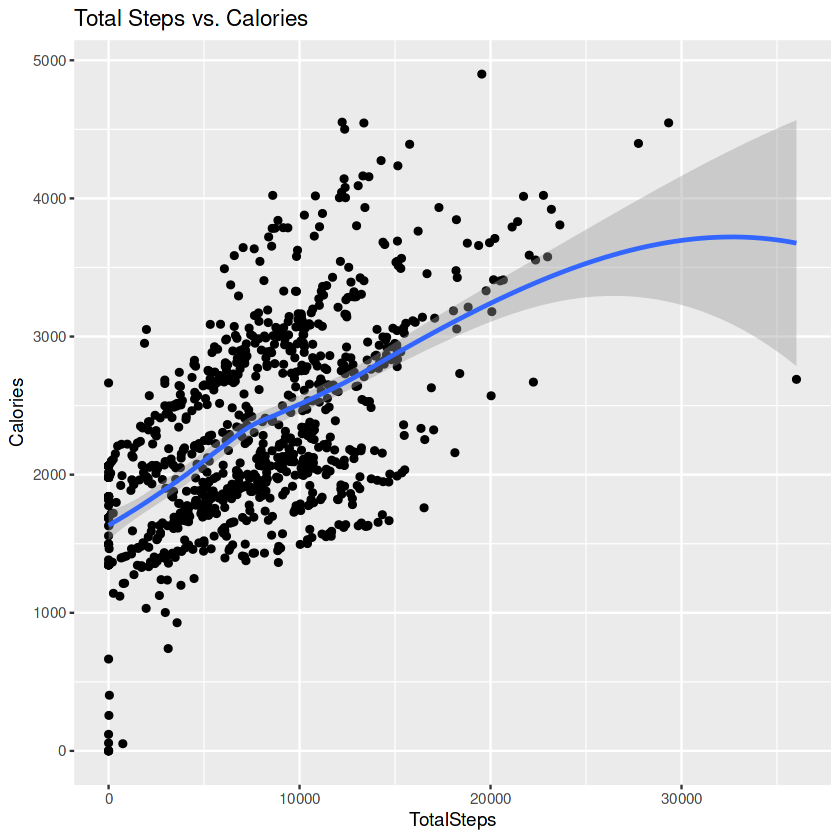

In [7]:
ggplot(data=activity, aes(x=TotalSteps, y=Calories)) + 
  geom_point() + geom_smooth() + labs(title="Total Steps vs. Calories")

We can see there is some correlation that more steps means more calories lost but we cannot account for the calories they are taking in and so maybe we can ask them to set a calorie loss goal that can correlate to the amount of min steps they would need.

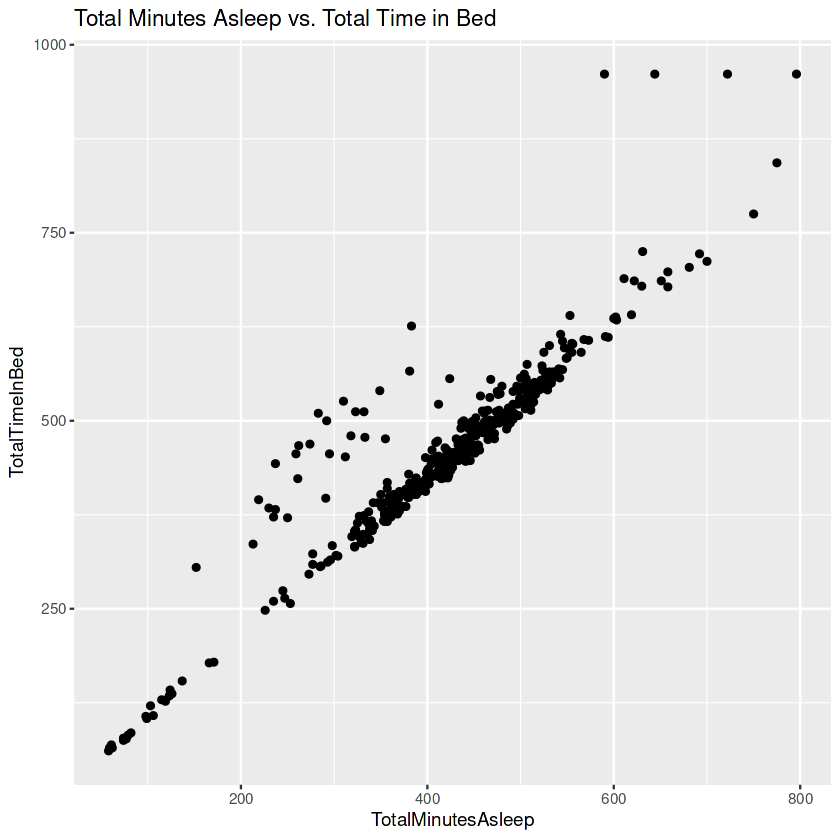

In [8]:
ggplot(data=sleep, aes(x=TotalMinutesAsleep, y=TotalTimeInBed)) + 
  geom_point()+ labs(title="Total Minutes Asleep vs. Total Time in Bed")

When comparing Time in Bed to Total Minutes Asleep, it seems that participants are either having a hard time falling asleep or waking up in the morning, Bellabeat can recommend a bedtime adjusted to the time they need to wakfor a better nights rest. They will fall asleep faster and wake up feeling more refreshed on a routine.

Let's see when that time could be best suggested for more steps by comparing Intensities over hours of the day.

Warning message in geom_histogram(stat = "identity", fill = "darkblue"):
“Ignoring unknown parameters: `binwidth`, `bins`, and `pad`”


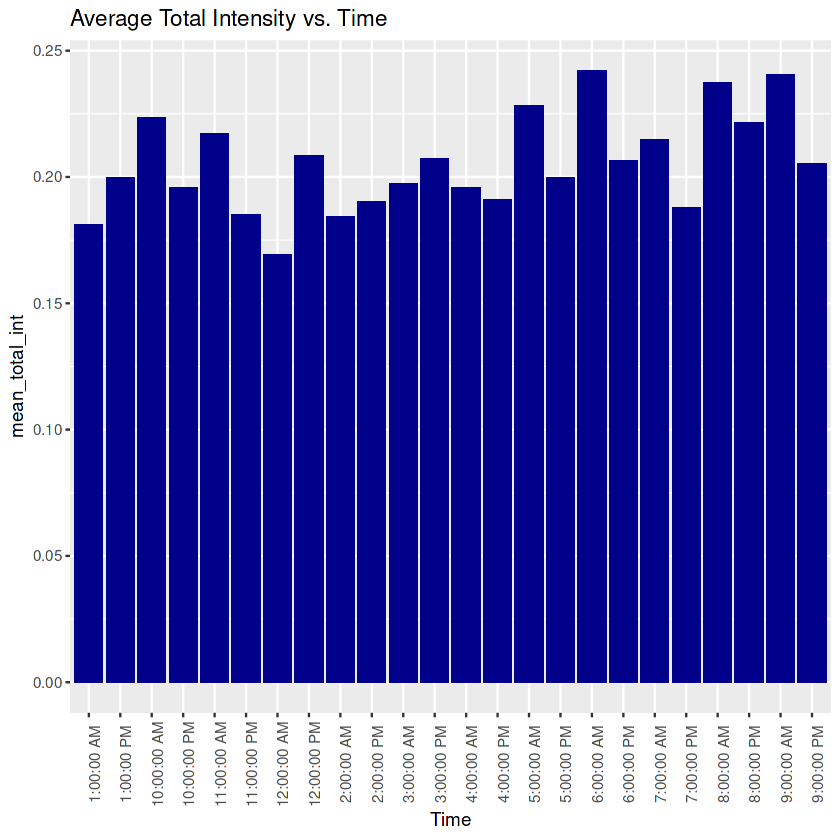

In [9]:
int_new <- intensities %>%
  group_by(Time) %>%
  drop_na() %>%
  summarise(mean_total_int = mean(AverageIntensity))

ggplot(data=int_new, aes(x=Time, y=mean_total_int)) + geom_histogram(stat = "identity", fill='darkblue') +
  theme(axis.text.x = element_text(angle = 90)) +
  labs(title="Average Total Intensity vs. Time")

After viewing the Intensities by hour, I see a lot of correlation with a typical busy mom schedule. Most active at 5-6 am and possible doing things around the house before the kids get up and then the hustle of the new day once they are up around 7-9 am.

In the evening, intensity is low during an average dinner time of 7 pm to go back up after cleaning up and getting kids bathed and in bed where it drops back down. We can prompt an after dinner family walk around 7pm as walking after a meal can be good for digestion while getting in those steps for a better nights rest.


**Summarizing Recommendations for the Business**

As we have seen, data collection on different areas of a womans health and using it to help empower women with knowledge of their own bodies is imperative in a society where we are not taught nearly enough. Since 2013, Bellabeats mission to do that has allowed them to rapidly grow as a tech-driven wellness company and after some analysis of the datasets given to me, I have a few insights to possibly further that mission.

**Target Audience**

Working women and moms who are taking care of house and office that want to track their activity and meet goals

These are women who have the desire to stay active with their sometimes more sedentary schedules and Bellabeat can be the catalyst that keeps them motivated to meet and surpass their fitness goals. Bellabeat is not just another fitness app, it is a guide who will empower the women seeking for a work/life balance with healthy habits and routines through daily app educational tips and reminders.

**Suggestions for Bellabeat**

1. Average total steps per day are 7638 which is a litte under the CDC recommended minimum daily. The CDC recommends 8-10,000 steps or at least 150 mins of brisk walking weekly. 
2. According to the United States Department of Agriculture’s Dietary Guidelines for Americans, women should eat between 1,600 and 2,400 calories per day. Exact daily intake recommendations vary depending on an individual’s lifestyle and various other health factors, Bellabeat can suggest family friendly dinners that are consistent with recommendations. Working moms are more likely to make a meal the whole family will eat to not waste time making different ones. Suggesting larger recipes can make great leftovers for lunch the next day.
3. Bellabeat can encourage users to take at least 30 minute brisk walks 5 days a week after dinner time as a family or with a partner/pet.
4. Increasing their steps in the evening along with a set bedtime can help users fall asleep sooner and get a better quality of sleep, spending less time in bed in the morning.

Thank you for you interest in my Bellabeat case study! 

